## Generating some data for linear regression

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The analytical way of solving y = mx + b

In [ ]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # we usually do not use this

## Plain vanilla Gradient Descent for Linear Regression

In [2]:
# params: X - feature matrix, y - target vector

def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = m_current * X + b_current
        cost = (1./N) * sum([err**2 for err in (y-y_current)]) # np.square as an option
        
        m_gradient = (-2./N)*sum(X*(y-y_current))
        b_gradient = (-2./N)*sum(y-y_current)
        
        m_current = m_current - learning_rate * m_gradient
        b_current = b_current - learning_rate * b_gradient        
        
    return m_current, b_current, cost

## Generate random points for linear regression
#### Example 1

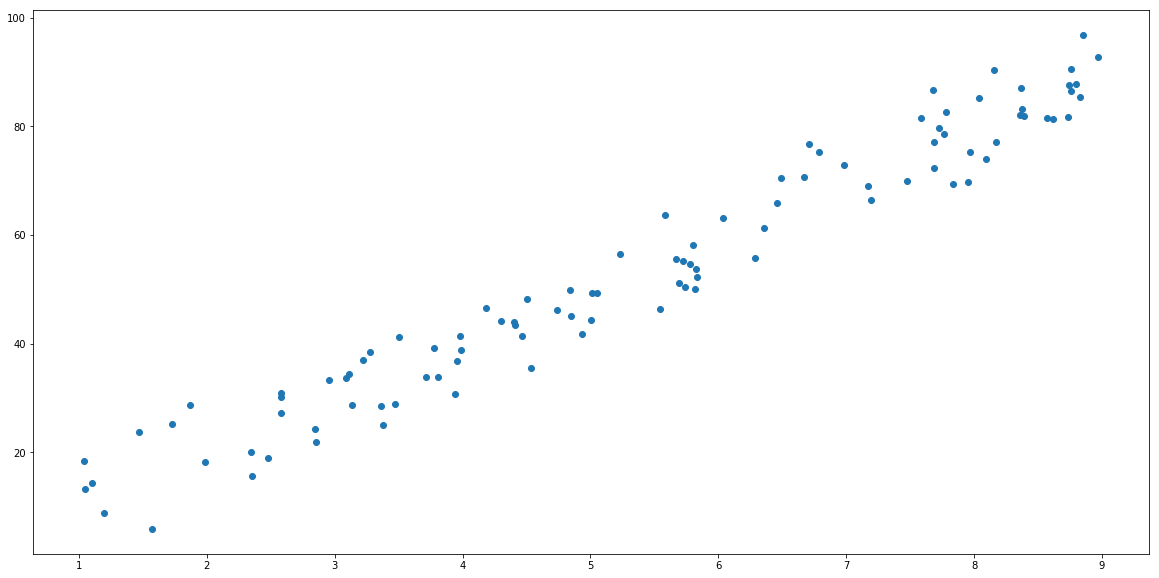

In [3]:
num_points = 100
m, b, delta = 10, 0, 10 # delta for variance

plt.figure(figsize=(20,10))
x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x+b-delta,m*x+b+delta) for x in x])

plt.scatter(x,y)

In [ ]:
m, b, cost = linear_regression(x,y) # fit linear regression

In [ ]:
# epochs = 1000
# learning rate = 0.0001

x_pr = np.arange(1,10,0.1) # plot dots as the regression line (x-coordinates)
y_pr = [m*elem+b for elem in x_pr] # get a y-output for the regression line for each dot in x_pr

plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.scatter(x_pr,y_pr,color='red',s=10)

print('MSE: {}'.format(cost))

#### Example 2

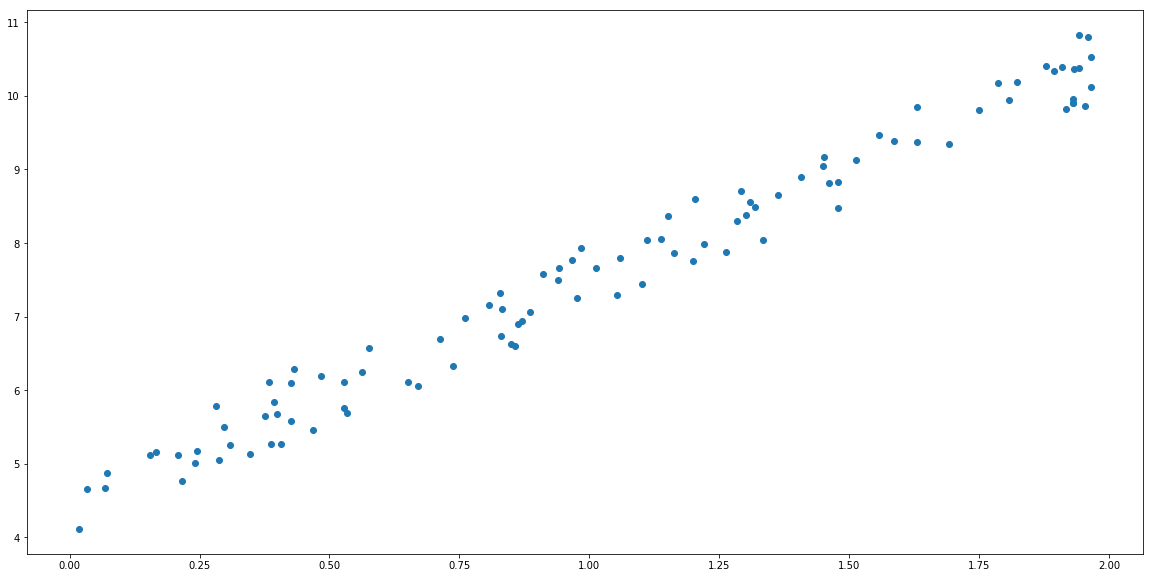

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.figure(figsize=(20,10))
plt.scatter(X, y)

In [4]:
m, b, cost = linear_regression(X,y)

MSE: [24.94019588]


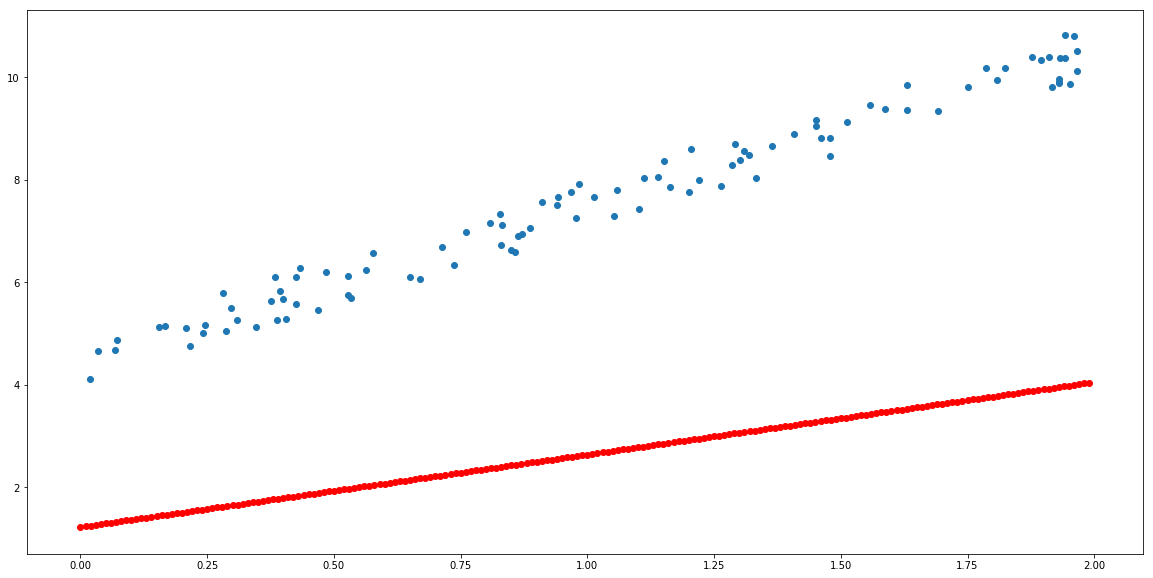

In [5]:
# epochs = 1000
# learning rate = 0.0001

x_pr = np.arange(0, 2, 0.01)
y_pr = [m*elem+b for elem in x_pr]

plt.figure(figsize=(20,10))
plt.scatter(X, y)
plt.scatter(x_pr, y_pr, color='red')

print('MSE: {}'.format(cost))

#### Low quality. Need to adjust hyper-parameters

In [6]:
m, b, cost = linear_regression(X,y, epochs=10000, learning_rate=0.01)

MSE: [0.08285922]


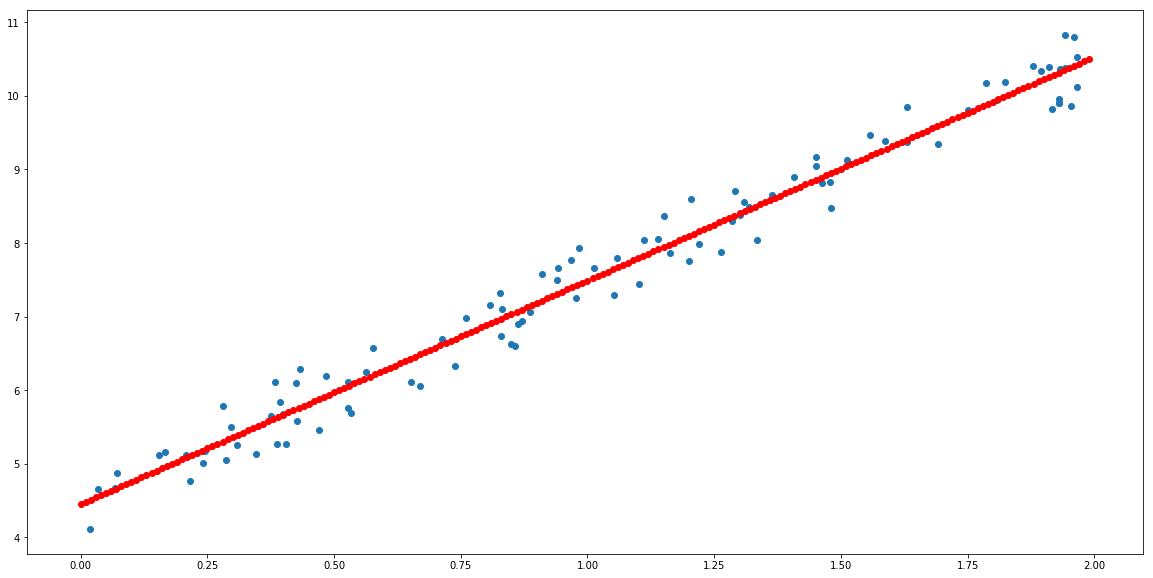

In [7]:
x_pr = np.arange(0, 2, 0.01)
y_pr = [m*elem+b for elem in x_pr]

plt.figure(figsize=(20,10))
plt.scatter(X, y)
plt.scatter(x_pr, y_pr, color='red')

print('MSE: {}'.format(cost))

#### Example 3 - Quadratic function

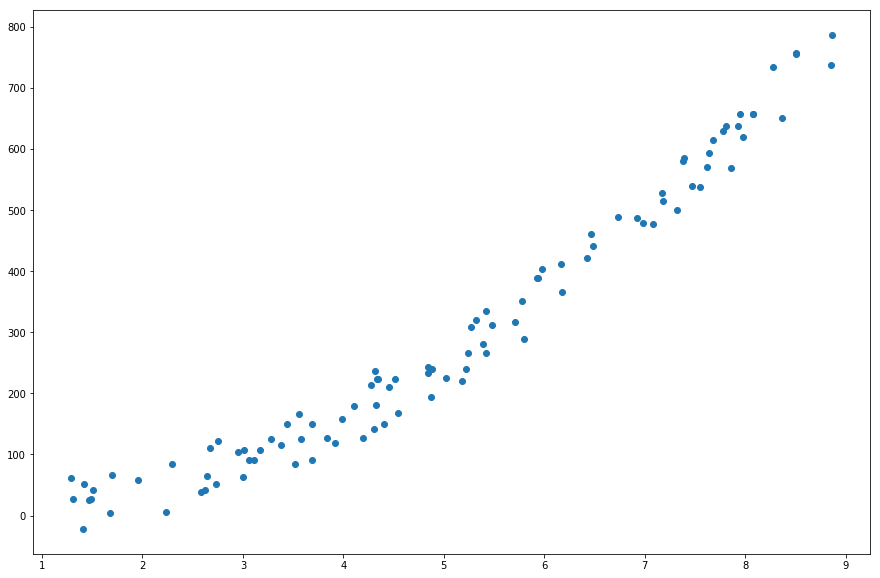

In [8]:
num_points = 100
m, b, delta = 10, 0, 50

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x*x+b-delta,m*x*x+b+delta) for x in x])

plt.figure(figsize=(15,10))
plt.scatter(x,y)

MSE: 840.8317443005409


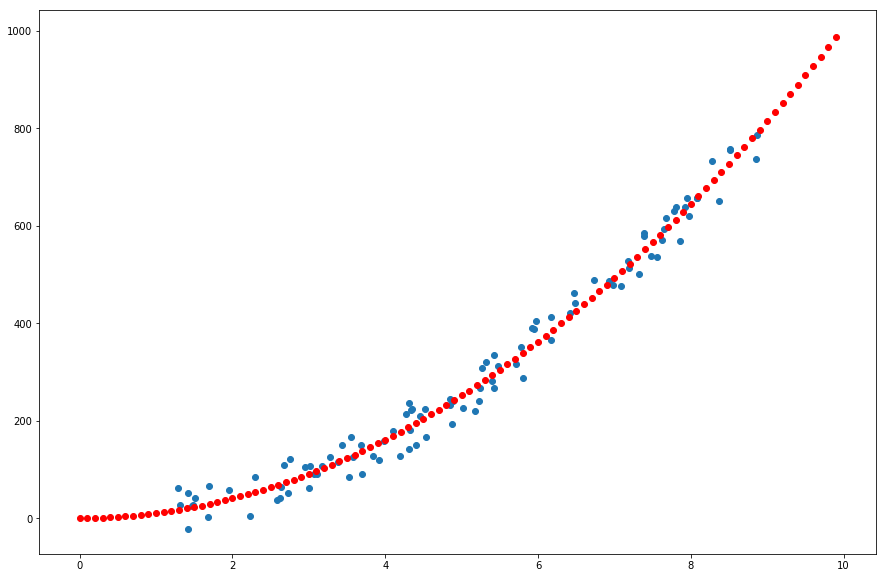

In [9]:
x2 = np.array([el**2 for el in x]) 

m, b, cost = linear_regression(x2,y, epochs=1000, learning_rate=0.0001)

x_pr = np.arange(0,10,0.1)
#y_pr = [m * elem**2 + b for elem in x_pr]

x_pr2 = x_pr ** 2
y_pr = [m * elem + b for elem in x_pr2]

plt.figure(figsize=(15,10))
plt.scatter(x, y)
plt.scatter(x_pr, y_pr, color='red')

print('MSE: {}'.format(cost))

####  
####  
#### Example 4 train_test_split and mean_squared_error applied to lin_reg function

In [ ]:
df = pd.read_csv('weights_heights.csv')
df.head()

In [ ]:
df.shape

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(df['Height'], df['Weight'], test_size=0.2)

m, b, cost = linear_regression(Xtrain, ytrain, learning_rate=0.00001)

In [ ]:
cost

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
pred_train = m * Xtrain + b
pred_test = m * Xtest + b

print(mean_squared_error(ytrain, pred_train))
print(mean_squared_error(ytest, pred_test))

#### Linear regression from sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# use array.reshape to input a single feature to lr.fit
Xtrain2 = Xtrain.values.reshape(-1,1) 
Xtest2 = Xtest.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(Xtrain2, ytrain)

pred_train2 = lr.predict(Xtrain2)
pred_test2 = lr.predict(Xtest2)

print(mean_squared_error(ytrain, pred_train2))
print(mean_squared_error(ytest, pred_test2))

#### Use cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

# cross_val_score gives negative MSE scoring so we need to negate cross_val_score to get positive MSE
print(-cross_val_score(lr, df[['Height']], df['Weight'], cv=3, scoring='neg_mean_squared_error').mean())

#### Correlation matrix

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

In [ ]:
# methods for toy datasets from sklearn
X_full = data.data
y_full = data.target

In [ ]:
print(-cross_val_score(lr, X_full, y_full, cv=3, scoring='neg_mean_squared_error').mean())

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.2)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

print('MSE on train: %.2f' % mean_squared_error(pred_train, ytrain))
print('MSE on test: %.2f' % mean_squared_error(pred_test, ytest))

In [ ]:
import seaborn as sns
# make a dataframe by np.c_ - concatenation of data and target, columns - labels in matrix
data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

corr = data1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="PiYG")

In [ ]:
# correlation between LSTAT and target
np.corrcoef(data1['DIS'],data1['target'])[0][1]

In [ ]:
# removing features with low correlation with target

data2 = data1.drop('CHAS', axis=1)

In [ ]:
X_full2 = data2.iloc[::, :12]
y_full2 = data2['target']
X_full2.head()

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full2, y_full2, test_size=0.2)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

print('MSE on train: %.2f' % mean_squared_error(pred_train, ytrain))
print('MSE on test: %.2f' % mean_squared_error(pred_test, ytest))

In [ ]:
for i in range(10):
    scorer = cross_val_score(lr, X_full2, y_full2, cv=i+2, scoring='r2').mean()
    print('%.2f' % scorer)

In [ ]:
from sklearn.metrics import r2_score

print('R2 on train: %.2f' % r2_score(ytrain, pred_train))
print('R2 on test: %.2f' % r2_score(ytest, pred_test))